In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [28]:
df = pd.read_csv('data/time_series.csv')
df.rename({"y": "data"}, axis=1, inplace=True)
df['data'] = df['data'].astype(np.int64)
df.head(5)

,data
0,20
1,7
2,9
3,10
4,21


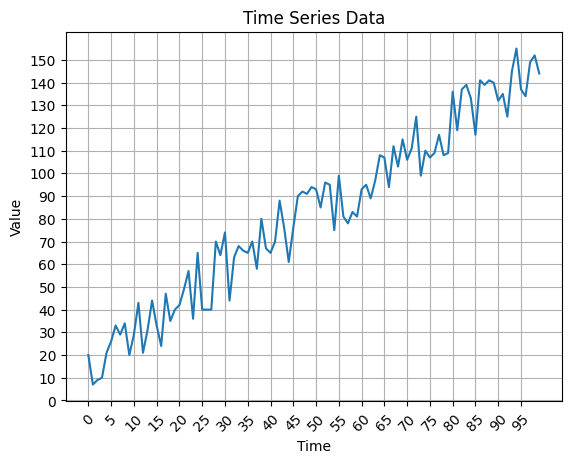

In [26]:
plt.plot(df['data'])
plt.title('Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.xticks(np.arange(0, len(df), step=5), rotation=45)
plt.yticks(np.arange(0, df['data'].max(), step=10))
plt.grid(True)
plt.show()


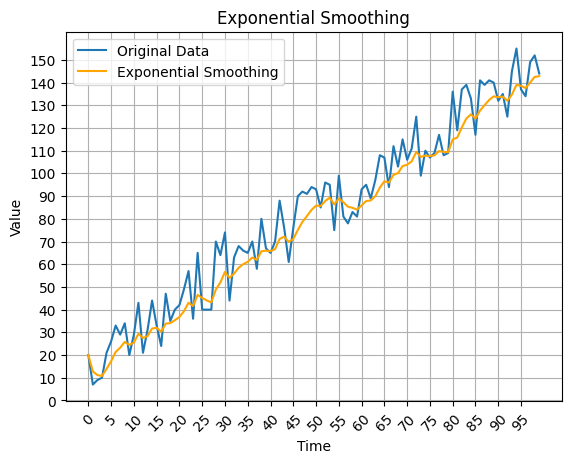

In [ ]:
alpha = 0.21
df['ewm'] = df['data'].ewm(alpha=alpha).mean()

plt.plot(df['data'], label='Original Data')
plt.plot(df['ewm'], label='Exponential Smoothing', color='orange')
plt.title('Exponential Smoothing')
plt.xlabel('Time')
plt.ylabel('Value')
plt.xticks(np.arange(0, len(df), step=5), rotation=45)
plt.yticks(np.arange(0, df['data'].max(), step=10))
plt.grid(True)
plt.legend()
plt.show()


In [48]:
a = df['ewm'].iloc[46]
b = df['ewm'].iloc[-1]
print(f"46th value: {a}, last value: {b}")

46th value: 75.08149110307157, last value: 142.83099351634598


In [ ]:
a, b = np.polyfit(df.index, df['data'], 1)
determination = np.corrcoef(df['data'], df['trend'])[0, 1] ** 2
next_approx = a * (len(df) + 1) + b
df['trend'] = a * df.index + b

print(f"Trend: {a}, Intercept: {b}")
print(f"Determination Coefficient: {determination}")
print(f"Next Approximation: {next_approx}")

Trend: 1.3251905190519049, Intercept: 16.87306930693068
Determination Coefficient: 0.9462903615974549
Next Approximation: 150.71731173117308


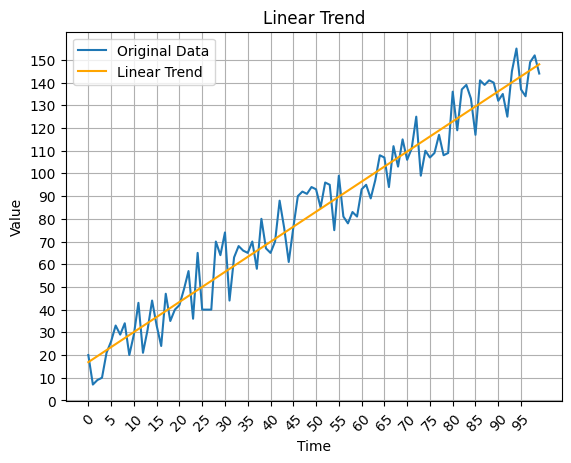

In [46]:
plt.plot(df['data'], label='Original Data')
plt.plot(df['trend'], label='Linear Trend', color='orange')
plt.title('Linear Trend')
plt.xlabel('Time')
plt.ylabel('Value')
plt.xticks(np.arange(0, len(df), step=5), rotation=45)
plt.yticks(np.arange(0, df['data'].max(), step=10))
plt.grid(True)
plt.legend()
plt.show()